<h1>Generating Data Based on:</h1>
<ol>
<li>AR3<ol>
    <li>Phi: autoregression weight</li>
    <li>Sigma: variance of noice</li>
    </ol>
    <br>
    
<li>ARMA(3,3)<ol>
    <li>Phi: autoregression weight</li>
    <li>Theta: moving average weight</li>
    <li>Sigma: variance of noise</li>
    <li>obs_cov</li>
    <li>state_cov</li>
    </ol>
    <br>
    
<li>ARX3<ol>
    <li>Phi: autoregression weight</li>
    <li>Sigma: variance of noice</li>
    </ol>
    <br>

<li>ARMAX(3,3)<ol>
    <li>Phi: autoregression weight</li>
    <li>Theta: moving average weight</li>
    <li>Sigma: variance of noise</li>
    <li>obs_cov</li>
    <li>state_cov</li>
    </ol>
    <br>
    
<li>TVARX<ol>
    <li>obs_cov</li>
    <li>state_cov</li>
    </ol>
    <br>
    </ol>



In [1]:
import numpy as np
from scipy.signal import lfilter
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.tools import (
    constrain_stationary_univariate, unconstrain_stationary_univariate)
import sympy as sym
%matplotlib inline


<li>AR2<ol>
    <li>Phi: autoregression weight</li>
    <li>Sigma: variance of noice</li>
    </ol>
</li>
\begin{equation*}
{\phi}(L)y_{t} = \epsilon_t \\
y_{t} = {\phi_1}y_{t-1} + {\phi_2}y_{t-2} +  \epsilon_t \\
(1-\sum_{1=1}^2 a_iL^i)y_t = \epsilon_t \\
\epsilon_t \sim N(0,\sigma^2)\\
\phi_1 = 0.5 \\
\phi_2 = -0.2 \\
\sigma^2 = 1
\end{equation*}
State Space Representation: 
\begin{equation*}
y_{t} = \begin{vmatrix}
1 & 0 
\end{vmatrix} \alpha_t \\
\alpha_{t+1} = \begin{vmatrix}
\phi_1 & \phi_2  \\
1 & 0  
\end{vmatrix} \alpha_t + \begin{vmatrix}
1 \\
0 
\end{vmatrix} \eta_t \\
\eta_t = \epsilon_{t+1} \sim N(0,\sigma^2)
\end{equation*}

In [2]:
# True model parameters
nobs = int(1e3)
true_phi = np.r_[0.5, -0.2]
true_sigma = 1**0.5

# Simulate a time series
np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
endog = lfilter([1], np.r_[1, -true_phi], disturbances)

In [3]:
# We could fit an AR(2) model, described above
mod_ar2 = sm.tsa.SARIMAX(endog, order=(2,0,0))
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_ar2 = mod_ar2.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_ar2.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1389.437
Date:                Mon, 09 Jan 2023   AIC                           2784.874
Time:                        11:01:52   BIC                           2799.598
Sample:                             0   HQIC                          2790.470
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4395      0.030     14.730      0.000       0.381       0.498
ar.L2         -0.2055      0.032     -6.523      0.000      -0.267      -0.144
sigma2         0.9425      0.042     22.413      0.0

<h1>Custom model: AR2</h1>

In [25]:
# Construct the model
class AR2(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Initialize the state space model
        super(AR2, self).__init__(endog, k_states=2, k_posdef=1,
                                  initialization='stationary')

        # Setup the fixed components of the state space representation
        self['design'] = [1, 0]
        self['transition'] = [[0, 0],
                                  [1, 0]]
        self['selection', 0, 0] = 1

    # Describe how parameters enter the model
    def update(self, params, transformed=True, **kwargs):
        params = super(AR2, self).update(params, transformed, **kwargs)

        self['transition', 0, :] = params[:2]
        self['state_cov', 0, 0] = params[2]

    # Specify start parameters and parameter names
    @property
    def start_params(self):
        return [0,0,1]  # these are very simple

# Create and fit the model
mod = AR2(endog)
res = mod.fit()
print(res.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48642D+00    |proj g|=  4.13724D-01

At iterate    5    f=  1.38944D+00    |proj g|=  2.39503D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   5.589D-07   1.389D+00
  F =   1.3894371898898661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observati

 This problem is unconstrained.


<li>AR3<ol>
    <li>Phi: autoregression weight</li>
    <li>Sigma: variance of noice</li>
    </ol>
    
\begin{equation*}
{\phi}(L)y_{t} = \epsilon_t \\
y_{t} = {\phi_1}y_{t-1} + {\phi_2}y_{t-2} + {\phi_3}y_{t-3} +\epsilon_t \\
(1-\sum_{1=1}^3 a_iL^i)y_t = \epsilon_t \\
\epsilon_t \sim N(0,\sigma^2)\\
\phi_1 = 0.5 \\
\phi_2 = -0.2 \\
\phi_3 = 0.3 \\
\sigma^2 = 1
\end{equation*}
    
State Space Representation (Hamilton): 

\begin{equation*}
y_{t} = \begin{vmatrix}
1 & 0 & 0
\end{vmatrix} \alpha_t \\
\alpha_{t+1} = \begin{vmatrix}
\phi_1 & \phi_2 & \phi_3 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{vmatrix} \alpha_t + \begin{vmatrix}
1 \\
0 \\
0
\end{vmatrix} \eta_t \\
\eta_t = \epsilon_{t+1} \sim N(0,\sigma^2)
\end{equation*}

In [4]:
# True model parameters
nobs = int(1e3)
true_phi3 = np.r_[0.5, -0.2, 0.3]
true_sigma = 1**0.5

# Simulate a time series
np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
endog3 = lfilter([1], np.r_[1, -true_phi3], disturbances)

In [14]:
# We could fit an AR(2) model, described above
mod_ar3 = sm.tsa.SARIMAX(endog3, order=(3,0,0))
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_ar3 = mod_ar3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_ar3.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1390.022
Date:                Mon, 09 Jan 2023   AIC                           2788.044
Time:                        11:03:19   BIC                           2807.675
Sample:                             0   HQIC                          2795.505
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4534      0.029     15.844      0.000       0.397       0.510
ar.L2         -0.2044      0.034     -6.084      0.000      -0.270      -0.139
ar.L3          0.3207      0.032     10.073      0.0

<h1>Custom model: AR3</h1>

In [33]:
# Construct the model
class AR3(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Initialize the state space model
        super(AR3, self).__init__(endog, k_states=3, k_posdef=1,
                                  initialization='stationary')

        # Setup the fixed components of the state space representation
        self['design'] = [1, 0, 0]
        self['transition'] = [[0, 0, 0],
                                  [1, 0, 0],
                                     [0, 1, 0]]
        self['selection', 0, 0] = 1
        
        self.positive_parameters = slice(4,5)

    # Describe how parameters enter the model
    def update(self, params, transformed=True, **kwargs):
        params = super(AR3, self).update(params, transformed, **kwargs)

        self['transition', 0, :] = params[:3]
        self['state_cov', 0, 0] = params[3]
        

    # Specify start parameters and parameter names
    @property
    def start_params(self):
        return [0,0,0,1]  # these are very simple
    
    def transform_params(self, unconstrained):
        """
        We constraint the last three parameters
        ('var.e', 'var.x.coeff', 'var.w.coeff') to be positive,
        because they are variances
        """
        constrained = unconstrained.copy()
        constrained[self.positive_parameters] = (
            constrained[self.positive_parameters] ** 2
        )
        constrained[0] = constrain_stationary_univariate(constrained[0:1])
        constrained[1] = constrain_stationary_univariate(constrained[1:2])
        constrained[2] = constrain_stationary_univariate(constrained[2:3])
        return constrained

    def untransform_params(self, constrained):
        """
        Need to unstransform all the parameters you transformed
        in the `transform_params` function
        """
        unconstrained = constrained.copy()
        unconstrained[self.positive_parameters] = (
            unconstrained[self.positive_parameters] ** 0.5
        )
        unconstrained[0] = unconstrain_stationary_univariate(constrained[0:1])
        unconstrained[1] = unconstrain_stationary_univariate(constrained[1:2])
        unconstrained[2] = unconstrain_stationary_univariate(constrained[2:3])
        return unconstrained

In [34]:
mod = AR3(endog3)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                            AR3   Log Likelihood               -1551.342
Date:                Mon, 09 Jan 2023   AIC                           3110.684
Time:                        12:06:37   BIC                           3130.315
Sample:                             0   HQIC                          3118.145
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
param.0             0      0.029          0      1.000      -0.057       0.057
param.1             0      0.030          0      1.000      -0.060       0.060
param.2             0      0.028          0      1.0

/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<li>ARMA3<ol>
    <li>Phi: autoregression weight</li>
    <li>Theta: moving average weight</li>
    <li>Sigma: variance of noise</li>
    <li>obs_cov</li>
    <li>state_cov</li>
    </ol>
</li>
<br>
    
\begin{equation*}
{\phi}(L)y_{t} = {\theta_1}(L)\epsilon_t \\
y_{t} = {\phi_1}y_{t-1} + {\phi_2}y_{t-2} + {\phi_3}y_{t-3} +\epsilon_t + {\theta_1}\epsilon_{t-1}+{\theta_2}\epsilon_{t-2}+{\theta_3}\epsilon_{t-3}\\
(1-\sum_{1=1}^3 \phi_iL^i)y_t = (1+\sum_{1=1}^3 \theta_iL^i)\epsilon_t \\
\epsilon_t \sim N(0,\sigma^2)\\
\phi_1 = 0.5 \\
\phi_2 = -0.2 \\
\phi_3 = 0.6 \\
\theta_1 = 0.3 \\
\theta_2 = -0.5 \\
\theta_3 = 0.8 \\
\sigma^2 = 1
\end{equation*}

State Space Representation (Harvey):
\begin{equation*}
y_{t} = \begin{vmatrix}
1 & 0 & 0 & 0
\end{vmatrix} \alpha_t \\
\alpha_{t+1} = \begin{vmatrix}
\phi_1 & 1 & 0 & 0\\
\phi_2 & 0 & 1 & 0\\
\phi_3 & 0 & 0 & 1\\
\phi_4 & 0 & 0 & 0
\end{vmatrix} \alpha_t + \begin{vmatrix}
1 \\
\theta_1 \\
\theta_2 \\
\theta_3
\end{vmatrix} \mu_t \\
\phi_4 = 0 \\
\mu_t = \epsilon_{t+1} \sim N(0,\sigma^2)
\end{equation*}

Note: 
\begin{equation*}
a_t = 
\begin{vmatrix}
y_{t-1} \\
\phi_2 y_{t-2} + \phi_3 y_{t-3} \\
\phi_3 y_{t-2} \\
\theta_3\epsilon_{t-3}
\end{vmatrix}
\end{equation*}

Derivation of data simulation from the system above:
\begin{equation*}
c = \begin{vmatrix}
1 & 0 & 0 & 0
\end{vmatrix}\\
q = \begin{vmatrix}
0.5 & 1 & 0 & 0\\
-0.2 & 0 & 1 & 0\\
0.6 & 0 & 0 & 1\\
0 & 0 & 0 & 0
\end{vmatrix}\\
d = \begin{vmatrix}
1 \\
0.3 \\
-0.5 \\
0.8
\end{vmatrix}\\
y_{t} =  c\alpha_t \\
\alpha_{t+1} =  q\alpha_t +  d\mu_t \\
\end{equation*}

Tranform into Laplace domain: 
\begin{equation*}
y_{t} =  c\alpha_t \\
\alpha_{t+1} =  q\alpha_t +  d\mu_t \\
\downarrow\\
Y_{s} =  CA_s \\
\frac{1}{s}A_{s} =  QA_s +  DM_s \\
\downarrow\\
Y_{s} =  CA_s \\
(\frac{1}{s}-Q)A_s = DM_s \\
\downarrow\\
Y_{s} =  CA_s \\
A_s = (\frac{1}{s}-Q)^{-1}DM_s \\
\downarrow\\
Y_{s} =  C(\frac{1}{s}-Q)^{-1}DM_s \\
\downarrow\\
H_s = \frac{Y_s}{M_s} = C(\frac{1}{s}-Q)^{-1}D
\end{equation*}

In [2]:
sym.init_printing()

s = sym.symbols('s')
matrix = sym.Matrix([[1/s-0.5, -1, 0, 0], 
                     [0.2, 1/s, -1, 0],
                     [-0.6, 0, 1/s, -1],
                     [0, 0, 0, 1/s]])

phi_inv = matrix.inv()

D = sym.Matrix([[1],[0.3],[-0.5],[0.8]])
C = sym.Matrix([[1,0,0,0]])

trans = sym.simplify(C*phi_inv*D)

An alternative format of the transfer function:


sym.init_printing()

s = sym.symbols('s')
matrix = sym.Matrix([[1-0.5*s, -s, 0, 0], 
                     [0.2*s, 1, -s, 0],
                     [-0.6*s, 0, 1, -s],
                     [0, 0, 0, 1]])

phi_inv = matrix.inv()

D = sym.Matrix([[1],[0.3],[-0.5],[0.8]])
C = sym.Matrix([[1,0,0,0]])

trans = sym.simplify(C*phi_inv*D)

trans is the transfer function

In [26]:
n,d = sym.fraction(trans[0])
a = sym.poly(n, s)
b = sym.poly(d, s)
n_coeffs = a.all_coeffs()
d_coeffs = b.all_coeffs()
n_coeffs.reverse()
d_coeffs.reverse()
trans_num1 = np.r_[n_coeffs].astype(None)
trans_den1 = np.r_[d_coeffs].astype(None)

nobs = int(1e3)
true_sigma = 1**0.5
# Simulate a time series
np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
endogARMA31 = lfilter(trans_num1, trans_den1, disturbances)

\begin{equation*}
H_s = \frac{0-0.008s-0.0024s^2+0.004s^3-0.0064s^4}{-0.008+0.004s-0.0016s^2+0.0048s^3}
\end{equation*}

In [16]:
# True model parameters
nobs = int(1e3)
true_phi3 = np.r_[0.5, -0.2, 0.6]
true_theta3 = np.r_[0.3, -0.5, 0.8]
true_sigma = 1**0.5

trans_num = np.r_[0, -0.008, -0.0024, 0.004, -0.0064]
trans_den = np.r_[-0.008, 0.004, -0.0016, 0.0048]
# Simulate a time series
np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
endogARMA3 = lfilter(trans_num, trans_den, disturbances)


In [28]:
# We could fit an AR(2) model, described above
mod_arma3 = sm.tsa.SARIMAX(endogARMA3, order=(3,0,3))
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_arma3 = mod_arma3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_arma3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -1599.328
Date:                Tue, 10 Jan 2023   AIC                           3212.655
Time:                        09:13:42   BIC                           3247.009
Sample:                             0   HQIC                          3225.712
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4810      0.031     15.707      0.000       0.421       0.541
ar.L2         -0.1958      0.034     -5.793      0.000      -0.262      -0.130
ar.L3          0.6147      0.030     20.630      0.0

<h1>Custom model: ARMA3</h1>

In [61]:
# Construct the model
class ARMA3(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Initialize the state space model
        super(ARMA3, self).__init__(endog, k_states=4, k_posdef=1,
                                  initialization='stationary')

        # Setup the fixed components of the state space representation
        self['design'] = [1, 0, 0, 0]
        self['transition'] = [[0, 1, 0, 0],
                                  [0, 0, 1, 0],
                                     [0, 0, 0, 1],
                                        [0, 0, 0, 0]]
        self['selection', 0, 0] = 1
        
        self.positive_parameters = slice(7,8)

    # Describe how parameters enter the model
    def update(self, params, transformed=True, **kwargs):
        params = super(ARMA3, self).update(params, transformed, **kwargs)

        self['transition', :3, 0] = params[:3]
        self['selection', 1:, 0] = params[3:6]
        self['state_cov', 0, 0] = params[6]
        

    # Specify start parameters and parameter names
    @property
    def start_params(self):
        return [0,0,0,0,0,0,1]  # these are very simple
    
    def transform_params(self, unconstrained):
        """
        We constraint the last three parameters
        ('var.e', 'var.x.coeff', 'var.w.coeff') to be positive,
        because they are variances
        """
        constrained = unconstrained.copy()
        constrained[self.positive_parameters] = (
            constrained[self.positive_parameters] ** 2
        )
        constrained[0] = constrain_stationary_univariate(constrained[0:1])
        constrained[1] = constrain_stationary_univariate(constrained[1:2])
        constrained[2] = constrain_stationary_univariate(constrained[2:3])
        constrained[3] = constrain_stationary_univariate(constrained[3:4])
        constrained[4] = constrain_stationary_univariate(constrained[4:5])
        constrained[5] = constrain_stationary_univariate(constrained[5:6])
        return constrained

    def untransform_params(self, constrained):
        """
        Need to unstransform all the parameters you transformed
        in the `transform_params` function
        """
        unconstrained = constrained.copy()
        unconstrained[self.positive_parameters] = (
            unconstrained[self.positive_parameters] ** 0.5
        )
        return unconstrained

In [62]:
mod = ARMA3(endogARMA3)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          ARMA3   Log Likelihood               -1599.328
Date:                Mon, 09 Jan 2023   AIC                           3212.655
Time:                        16:19:21   BIC                           3247.009
Sample:                             0   HQIC                          3225.712
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
param.0        0.4810      0.031     15.706      0.000       0.421       0.541
param.1       -0.1958      0.034     -5.793      0.000      -0.262      -0.130
param.2        0.6147      0.030     20.629      0.0

<h1>AIC</h1>

In [35]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [36]:
AIC = np.empty([5,5])
#AIC = pd.DataFrame()
for i in range(1,6):
    for j in range(1,6):
        # We could fit an AR(2) model, described above
        mod = sm.tsa.SARIMAX(endogARMA3, order=(i,0,j))
        # Note that mod_ar2 is an instance of the SARIMAX class

        # Fit the model via maximum likelihood
        res = mod.fit()
        
        aic = res.aic
        AIC[i-1,j-1] = aic
        '''
        temp = pd.DataFrame({'ar': [i],\
                            'ma': [j],\
                            'aic': [aic]})
        
        AIC = AIC.append(temp)
        '''

/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
#AIC = np.empty([5,5])
AIC_df = pd.DataFrame()
d = 8
for i in range(1,d+1):
    for j in range(1,d+1):
        # We could fit an AR(2) model, described above
        mod = sm.tsa.SARIMAX(endogARMA3, order=(i,0,j))
        # Note that mod_ar2 is an instance of the SARIMAX class

        # Fit the model via maximum likelihood
        res = mod.fit()
        
        aic = res.aic
        #AIC[i-1,j-1] = aic
        temp = pd.DataFrame({'ar': [i],\
                            'ma': [j],\
                            'aic': [aic]})
        
        AIC_df = AIC_df.append(temp)
AIC_df = AIC_df.reset_index()
AIC_df = AIC_df.drop(['index'],axis = 1)
AIC_df_wide = pd.pivot(AIC_df, index = 'ar', columns='ma')

/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/theo/opt/anaconda3/lib/python3.8/site-packages/st

In [91]:
AIC_df[['aic']].idxmin()

aic    18
dtype: int64

In [92]:
AIC_df.iloc[18]

index       0.000000
ar          3.000000
ma          3.000000
aic      3212.655063
Name: 18, dtype: float64

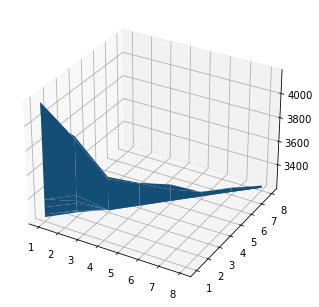

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
x = range(1,9)
surf = ax.plot_surface(x, x, AIC_df_wide)

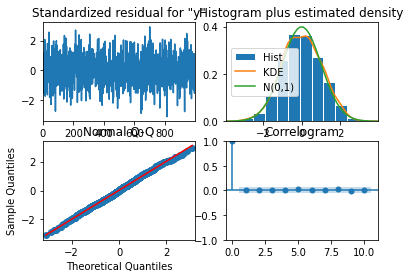

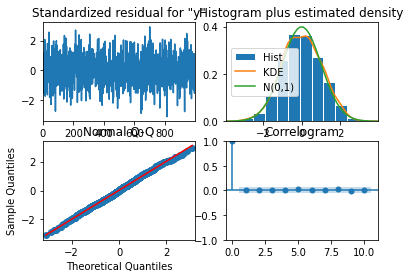

In [51]:
res_arma3.plot_diagnostics()

<h1>ARX3</h1>

In [27]:
test = U[np.newaxis, np.newaxis, :]
zero = np.zeros([1,1,len(U)])
one = np.ones([1,1,len(U)])
con_design = np.concatenate((one,zero,zero,test,zero,zero), axis = 1)

In [49]:
k_states = 6
transition = np.eye(k_states, k = 1)
transition[2,3] = 0

In [50]:
transition

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [2]:
class TVRegression(sm.tsa.statespace.MLEModel):
    def __init__(self, y_t, x_t):
        exog = x_t  # shaped nobs x 2

        super(TVRegression, self).__init__(
            endog=y_t, exog=exog, k_states=6, initialization="diffuse"
        )

        # Since the design matrix is time-varying, it must be
        # shaped k_endog x k_states x nobs
        # Notice that exog.T is shaped k_states x nobs, so we
        # just need to add a new first axis with shape 1
        test = exog[np.newaxis, np.newaxis, :]
        zero = np.zeros([1,1,len(exog)])
        one = np.ones([1,1,len(exog)])
        con_design = np.concatenate((one,zero,zero,test,zero,zero), axis = 1)
        
        self.ssm["design"] = con_design  # shaped 1 x 6 x nobs
        #self.ssm["selection"] = np.zeros(self.k_states)
        self.ssm["selection", 0, 0] = 1
        #self.ssm["selection", 3, 0] = 1
        self.ssm["transition"] = np.eye(self.k_states, k = 1)
        self.ssm["transition", 2, 3] = 0

        # Which parameters need to be positive?
        self.positive_parameters = slice(7, 8)

    def update(self, params, **kwargs):
        params = super(TVRegression, self).update(params, **kwargs)

        self["transition", :3, 0] = params[0:3]
        self["transition", 3:, 3] = params[3:6]
        self["state_cov", 0, 0] = params[6]
        
    @property
    def param_names(self):
        return ["phi1", "phi2", "phi3", "beta1", "beta2", "beta3", "cov"]

    @property
    def start_params(self):
        """
        Defines the starting values for the parameters
        The linear regression gives us reasonable starting values for the constant
        d and the variance of the epsilon error
        """
        params = np.r_[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 1]
        return params

    def transform_params(self, unconstrained):
        """
        We constraint the last three parameters
        ('var.e', 'var.x.coeff', 'var.w.coeff') to be positive,
        because they are variances
        """
        constrained = unconstrained.copy()
        constrained[self.positive_parameters] = (
            constrained[self.positive_parameters] ** 2
        )
        return constrained

    def untransform_params(self, constrained):
        """
        Need to unstransform all the parameters you transformed
        in the `transform_params` function
        """
        unconstrained = constrained.copy()
        unconstrained[self.positive_parameters] = (
            unconstrained[self.positive_parameters] ** 0.5
        )
        return unconstrained


In [72]:
rng = np.random.default_rng(20210819)
eta = rng.standard_normal(5200)
rho = 0.8
beta = 10
epsilon = eta.copy()
for i in range(1, eta.shape[0]):
    epsilon[i] = rho * epsilon[i - 1] + eta[i]
y = beta + epsilon
y = y[200:]

In [77]:
full_x = rng.standard_normal(eta.shape)
x = full_x[200:]

In [76]:
rho = 0.8
beta = 2
delta0 = 10
delta1 = 0.5
epsilon = eta.copy()
for i in range(1, eta.shape[0]):
    epsilon[i] = rho * epsilon[i - 1] + eta[i]
t = np.arange(epsilon.shape[0])
y = delta0 + delta1 * t + beta * full_x + epsilon
y = y[200:]

In [82]:
# We could fit an AR(2) model, described above
mod_arx3 = TVRegression(y, x)
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_arx3 = mod_arx3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_arx3.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5000
Model:                   TVRegression   Log Likelihood          -686469560.069
Date:                Tue, 10 Jan 2023   AIC                     1372939146.138
Time:                        20:43:46   BIC                     1372939230.861
Sample:                             0   HQIC                    1372939175.832
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi1          -0.0022   1.06e-09  -2.04e+06      0.000      -0.002      -0.002
phi2           0.1652    1.1e-09    1.5e+08      0.000       0.165       0.165
phi3           0.8378   1.06e-09   7.89e+08      0.0

/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
len(y)

In [6]:
# We could fit an AR(2) model, described above
mod_arx3 = TVRegression(endogARX, U)
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_arx3 = mod_arx3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_arx3.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                   TVRegression   Log Likelihood               -2373.730
Date:                Thu, 12 Jan 2023   AIC                           4773.461
Time:                        20:03:10   BIC                           4837.261
Sample:                             0   HQIC                          4797.709
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi1           0.2182      0.027      8.139      0.000       0.166       0.271
phi2           0.0716      0.026      2.742      0.006       0.020       0.123
phi3           0.2070      0.026      8.100      0.0

<li>ARX3<ol>
    <li>Phi: autoregression weight</li>
    <li>Sigma: variance of noice</li>
    </ol>
</li>
    
\begin{equation*}
{\phi}(L)y_{t} = {\beta}(L)u_{t-n} + \epsilon_t \\
y_{t} = {\phi_1}y_{t-1} + {\phi_2}y_{t-2} + {\phi_3}y_{t-3} + {\beta_1}u_{t-n-1} + \
    {\beta_2}u_{t-n-2} + {\beta_3}u_{t-n-3} + \epsilon_t \\
(1-\sum_{1=1}^3 a_iL^i)y_t = \sum_{1=1}^3 b_iL^iu_{t-n} + \epsilon_t \\
\epsilon_t \sim N(0,\sigma^2)\\
n = 1 \\
\phi_1 = 0.5 \\
\phi_2 = -0.2 \\
\phi_3 = 0.3 \\
\beta_1 = 0.4 \\
\beta_2 = -0.3 \\
\beta_3 = 0.6 \\
\sigma^2 = 1 \\
\textrm{n: system delay} 
\end{equation*}
    
State Space Representation (Harvey): 

\begin{equation*}
y_{t} = \begin{vmatrix}
1 & 0 & 0 & ut & 0 & 0  
\end{vmatrix} \alpha_t \\
\textrm{shaped 1 x 6 x nobs} \\
\alpha_{t+1} = \begin{vmatrix}
\phi_1 & 1 & 0 & 0 & 0 & 0\\
\phi_2 & 0 & 1 & 0 & 0 & 0\\
\phi_3 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & \beta_1 & 1 & 0\\
0 & 0 & 0 & \beta_2 & 0 & 1\\
0 & 0 & 0 & \beta_3 & 0 & 0
\end{vmatrix} \alpha_t + \mu_t \\
\mu_t = \epsilon_{t+1} \sim N(0,\sigma^2)
\end{equation*}

\begin{equation*}
a_t = 
\begin{vmatrix}
y_{t-1} \\
\phi_2 y_{t-2} + \phi_3 y_{t-3} \\
\phi_3 y_{t-2} \\
u_{t-1} \\
\beta_2 u_{t-2} + \beta_3 u_{t-3} \\
\beta_3 u_{t-2} \\
\end{vmatrix}
\end{equation*}

Tranform into Laplace domain: 
\begin{equation*}
y_{t} =  c\alpha_{c,t} + u_tc\alpha_{u,t}\\
\alpha_{c,t+1} =  q_1\alpha_{c,t} +  d\mu_t \\
\alpha_{u,t+1} =  q_2\alpha_{u,t}\\
\downarrow\\
Y_{s} =  CA_{c,s} + U_sCA_{u,s}\\
\frac{1}{s}A_{c,s} =  Q_1A_{c,s} +  DM_s \\
\frac{1}{s}A_{u,s} =  Q_2A_{u,s}\\
\downarrow\\
Y_{s} =  CA_{c,s} + U_sCA_{u,s}\\
(\frac{1}{s}-Q_1)A_{c,s} = DM_s \\
(\frac{1}{s}-Q_2)A_{u,s} = 1\\
\downarrow\\
Y_{s} =  CA_{c,s} + U_sCA_{u,s}\\
A_{c,s} = (\frac{1}{s}-Q_1)^{-1}DM_s \\
A_{u,s} = (\frac{1}{s}-Q_2)^{-1} \\
\downarrow\\
Y_{s} =  C(\frac{1}{s}-Q_1)^{-1}DM_s + U_sC(\frac{1}{s}-Q_2)^{-1} \\
\end{equation*}

In [3]:
# True model parameters
nobs = int(1e3)
true_phi = np.r_[0.5, -0.2, 0.6]
true_beta = np.r_[0.3, -0.5, 0.8]
true_theta = np.r_[0, 0]
true_sigma = 1**0.5
true_sigma_U = 1**0.5

np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
U = np.random.normal(0, true_sigma_U, size=(nobs,))

p = len(true_phi)
q = len(true_beta)
d = max(p,q)

In [4]:
Q1 = np.eye(d,k=1)
Q1[:p,0] = true_phi

Q2 = np.eye(d,k=1)
Q2[:p,0] = true_beta

sym.init_printing()
s = sym.symbols('s')
s_ = sym.Matrix(np.eye(d, dtype=int)*1/s)
phi1 = s_ - Q1
phi2 = s_ - Q2

phi_inv1 = phi1.inv()
phi_inv2 = phi2.inv()

C_np = np.zeros((1,d))
C_np[0,0] = 1
C = sym.Matrix(C_np)

D = np.zeros((d,1))
D[:d,0] = np.r_[1,true_theta]

trans1 = sym.simplify(C*phi_inv1*D)
trans2 = sym.simplify(C*phi_inv2*D)

n,d = sym.fraction(trans1[0])
a = sym.poly(n, s)
b = sym.poly(d, s)
n_coeffs = a.all_coeffs()
d_coeffs = b.all_coeffs()
n_coeffs.reverse()
d_coeffs.reverse()
trans_num = np.r_[n_coeffs].astype(None)
trans_den = np.r_[d_coeffs].astype(None)

n1,d1 = sym.fraction(trans2[0])
a1 = sym.poly(n1, s)
b1 = sym.poly(d1, s)
n_coeffs1 = a1.all_coeffs()
d_coeffs1 = b1.all_coeffs()
n_coeffs1.reverse()
d_coeffs1.reverse()
trans_num1 = np.r_[n_coeffs1].astype(None)
trans_den1 = np.r_[d_coeffs1].astype(None)

endog = lfilter(trans_num, trans_den, disturbances)
dependent = lfilter(trans_num1, trans_den1, U)
de_WN = dependent * disturbances
endogARX = endog + de_WN

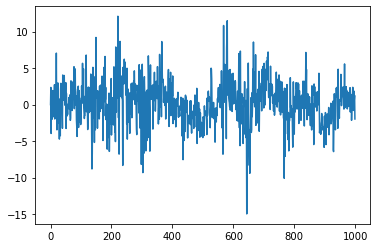

In [5]:
plt.plot(endogARX)

In [64]:
# We could fit an AR(2) model, described above
mod_arx3 = sm.tsa.SARIMAX(endogARX, exog = U, order=(3,0,3))
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_arx3 = mod_arx3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_arx3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -2371.374
Date:                Tue, 10 Jan 2023   AIC                           4758.749
Time:                        20:23:43   BIC                           4798.011
Sample:                             0   HQIC                          4773.671
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1155      0.076     -1.520      0.129      -0.264       0.033
ar.L1          0.3030      0.138      2.200      0.028       0.033       0.573
ar.L2         -0.1055      0.122     -0.863      0.3

In [ ]:
TVRegression

In [69]:
# We could fit an AR(2) model, described above
mod_arx3 = TVRegression(endogARX, U)
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_arx3 = mod_arx3.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_arx3.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                   TVRegression   Log Likelihood              -58116.980
Date:                Tue, 10 Jan 2023   AIC                         116259.959
Time:                        20:27:39   BIC                         116323.760
Sample:                             0   HQIC                        116284.208
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi1          -0.0724   9.38e-05   -771.482      0.000      -0.073      -0.072
phi2           0.7248   5.79e-05   1.25e+04      0.000       0.725       0.725
phi3           0.3538      0.000   3301.546      0.0

/Users/theo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
